In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
# Loading in csv file
df = pd.read_csv("00_alla_företag_cleaned.csv", dtype={"sni_kod": str})
df

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
0,Konkurs avslutad,Ale_kommun,MK Hytt & Transport AB,556932-9609,Aktiebolag,073-,073-941 50 56,Hult 545,449 90,Nol,...,NaN,4.021,5.595,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569329609-MK_Hytt_...
1,Konkurs avslutad,Ale_kommun,Ale Frukt & Grönt AB,556979-2509,Aktiebolag,0303-,0303-22 97 50,Nödingevägen 9,449 31,Nödinge,...,NaN,6.097,4.083,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569792509-Ale_Fruk...
2,Konkurs avslutad,Ale_kommun,Ale Torg nr 7 AB,556708-4552,Aktiebolag,-,-,Ale Torg 7,449 31,Nödinge,...,NaN,3.806,3.558,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567084552-Ale_Torg...
3,Konkurs avslutad,Ale_kommun,Verle Infra Consult AB,559107-0973,Aktiebolag,073-,073-066 76 18,Grimsäng 315,446 96,Hålanda,...,NaN,0.000,0.000,0.762,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5591070973-Verle_In...
4,Likvidation avslutad,Ale_kommun,Gotentia Fastigheter AB,556759-5722,Aktiebolag,-,-,c/o Företagsbyrån i Ale AB Hålstensvägen 6,446 37,Älvängen,...,NaN,0.000,0.000,0.000,0.563,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567595722-Gotentia...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771552,Aktiv,Övertorneå_kommun,"LEJON, ÖSTEN",540729-XXXX,Enskild näringsidkare,0927-,0927-774 10,Åkerbärsvägen 8,957 32,ÖVERTORNEÅ,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,"https://www.bolagsfakta.se/540729EQZQ-LEJON,_O..."
771553,Aktiv,Övertorneå_kommun,synska agnes,560914-XXXX-00001,Enskild näringsidkare,070-,070-584 88 58,c/o Agneta Öhman Kulmungi 18,980 60,Korpilombolo,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/560914EYZJ00001-syn...
771554,Aktiv,Övertorneå_kommun,"Valencia, Penelope",730811-XXXX,Enskild näringsidkare,-,-,Matarengivägen 40 lgh 0003,957 31,Övertorneå,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/730811EATM-Valencia...
771555,Aktiv,Övertorneå_kommun,"ÖHMAN, MARIA",750207-XXXX,Enskild näringsidkare,0927-,0927-107 38,Sidogränd 3,957 32,ÖVERTORNEÅ,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,"https://www.bolagsfakta.se/750207UQMS-OHMAN,_M..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771557 entries, 0 to 771556
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   status               771557 non-null  object 
 1   kommun               771557 non-null  object 
 2   company_name         771557 non-null  object 
 3   org_number           771557 non-null  object 
 4   bolagsform           771557 non-null  object 
 5   riktnummer           771557 non-null  object 
 6   phone_number         771557 non-null  object 
 7   adress               771557 non-null  object 
 8   postnummer           771557 non-null  object 
 9   postort              771557 non-null  object 
 10  sni_kod              770100 non-null  object 
 11  sni_beskrivning      770100 non-null  object 
 12  bolaget_registrerat  771529 non-null  object 
 13  end_date             52160 non-null   object 
 14  anstallda_2015       769408 non-null  float64
 15  anstallda_2016   

In [4]:
df.bolaget_registrerat = pd.to_datetime(df.bolaget_registrerat)
df.end_date = pd.to_datetime(df.end_date)
df

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
0,Konkurs avslutad,Ale_kommun,MK Hytt & Transport AB,556932-9609,Aktiebolag,073-,073-941 50 56,Hult 545,449 90,Nol,...,NaN,4.021,5.595,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569329609-MK_Hytt_...
1,Konkurs avslutad,Ale_kommun,Ale Frukt & Grönt AB,556979-2509,Aktiebolag,0303-,0303-22 97 50,Nödingevägen 9,449 31,Nödinge,...,NaN,6.097,4.083,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569792509-Ale_Fruk...
2,Konkurs avslutad,Ale_kommun,Ale Torg nr 7 AB,556708-4552,Aktiebolag,-,-,Ale Torg 7,449 31,Nödinge,...,NaN,3.806,3.558,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567084552-Ale_Torg...
3,Konkurs avslutad,Ale_kommun,Verle Infra Consult AB,559107-0973,Aktiebolag,073-,073-066 76 18,Grimsäng 315,446 96,Hålanda,...,NaN,0.000,0.000,0.762,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5591070973-Verle_In...
4,Likvidation avslutad,Ale_kommun,Gotentia Fastigheter AB,556759-5722,Aktiebolag,-,-,c/o Företagsbyrån i Ale AB Hålstensvägen 6,446 37,Älvängen,...,NaN,0.000,0.000,0.000,0.563,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567595722-Gotentia...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771552,Aktiv,Övertorneå_kommun,"LEJON, ÖSTEN",540729-XXXX,Enskild näringsidkare,0927-,0927-774 10,Åkerbärsvägen 8,957 32,ÖVERTORNEÅ,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,"https://www.bolagsfakta.se/540729EQZQ-LEJON,_O..."
771553,Aktiv,Övertorneå_kommun,synska agnes,560914-XXXX-00001,Enskild näringsidkare,070-,070-584 88 58,c/o Agneta Öhman Kulmungi 18,980 60,Korpilombolo,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/560914EYZJ00001-syn...
771554,Aktiv,Övertorneå_kommun,"Valencia, Penelope",730811-XXXX,Enskild näringsidkare,-,-,Matarengivägen 40 lgh 0003,957 31,Övertorneå,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/730811EATM-Valencia...
771555,Aktiv,Övertorneå_kommun,"ÖHMAN, MARIA",750207-XXXX,Enskild näringsidkare,0927-,0927-107 38,Sidogränd 3,957 32,ÖVERTORNEÅ,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,"https://www.bolagsfakta.se/750207UQMS-OHMAN,_M..."


# Plotts

In [5]:
# plot settings
font1 = {'family':'serif','color':'black','size':22}
font2 = {'family':'serif','color':'darkred','size':15}
font3 = {'family':'serif','color':'black','size':10}
plt.rcParams["font.size"] = 15

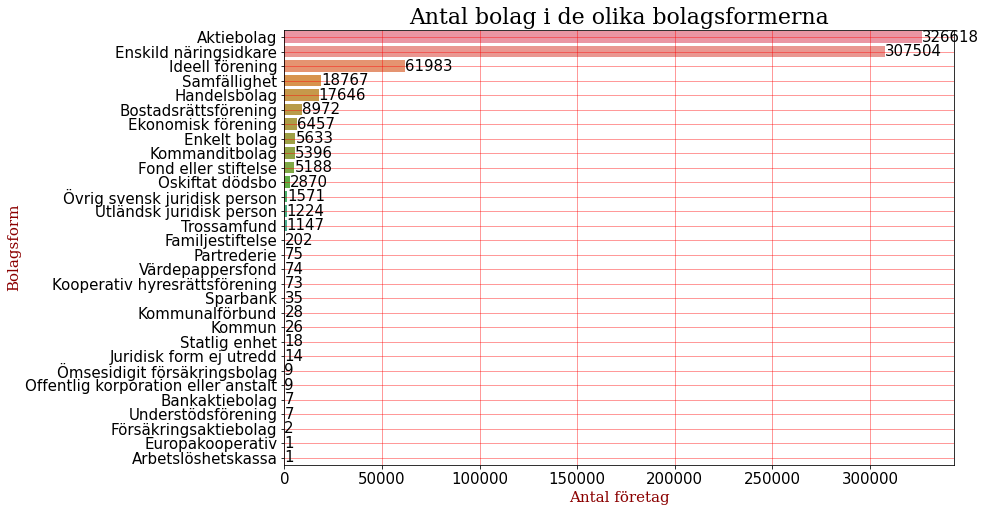

In [6]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = df, y = "bolagsform",
                  order=df.bolagsform.value_counts().index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("Bolagsform", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Antal bolag i de olika bolagsformerna",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

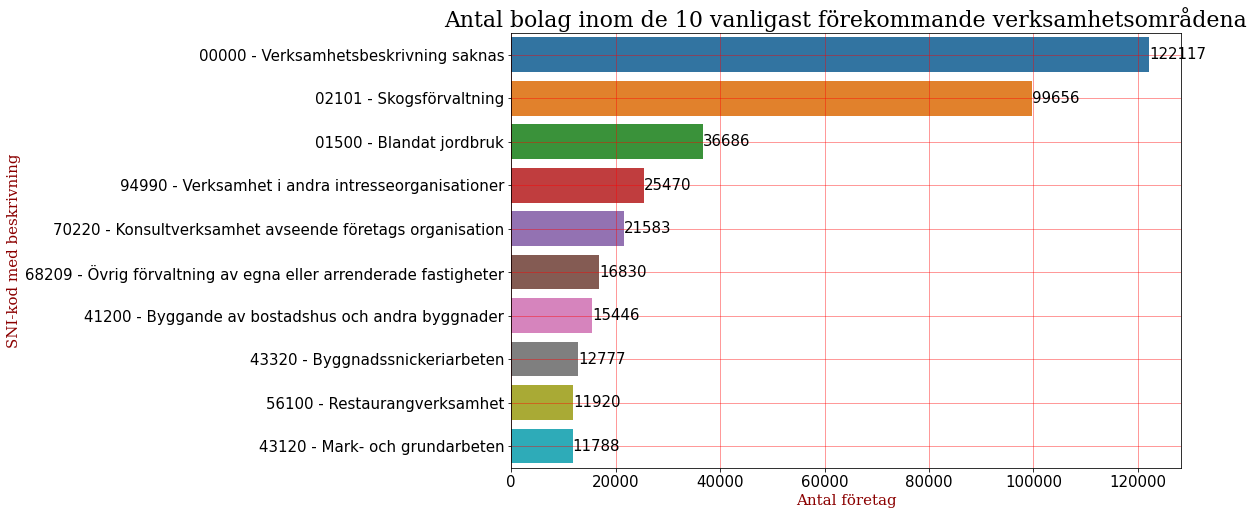

In [7]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = df, y = "sni_beskrivning",
                  order=df.sni_beskrivning.value_counts().iloc[:10].index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("SNI-kod med beskrivning", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Antal bolag inom de 10 vanligast förekommande verksamhetsområdena",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

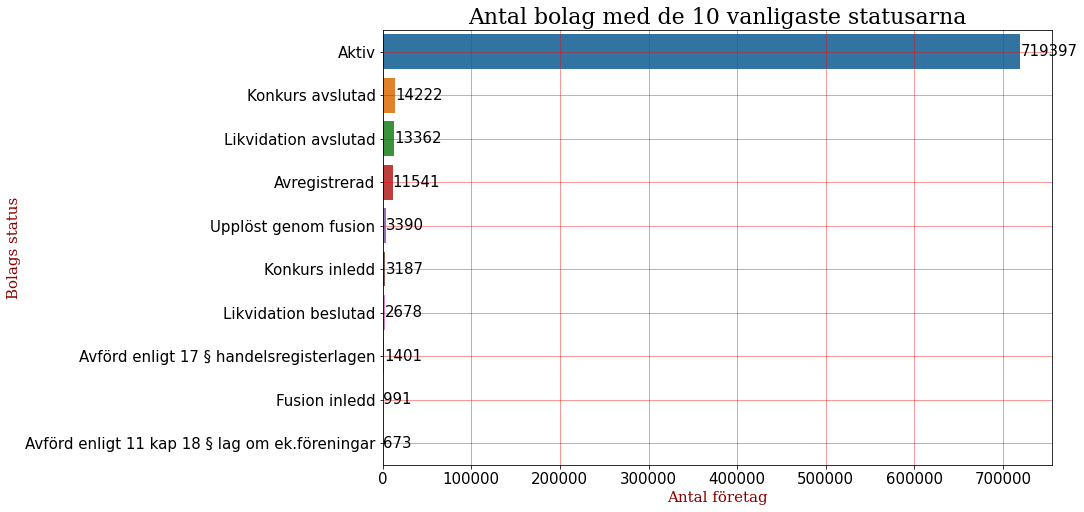

In [8]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = df, y = "status",
                  order=df.status.value_counts().iloc[:10].index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("Bolags status", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Antal bolag med de 10 vanligaste statusarna",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

### Bolaget registrerat

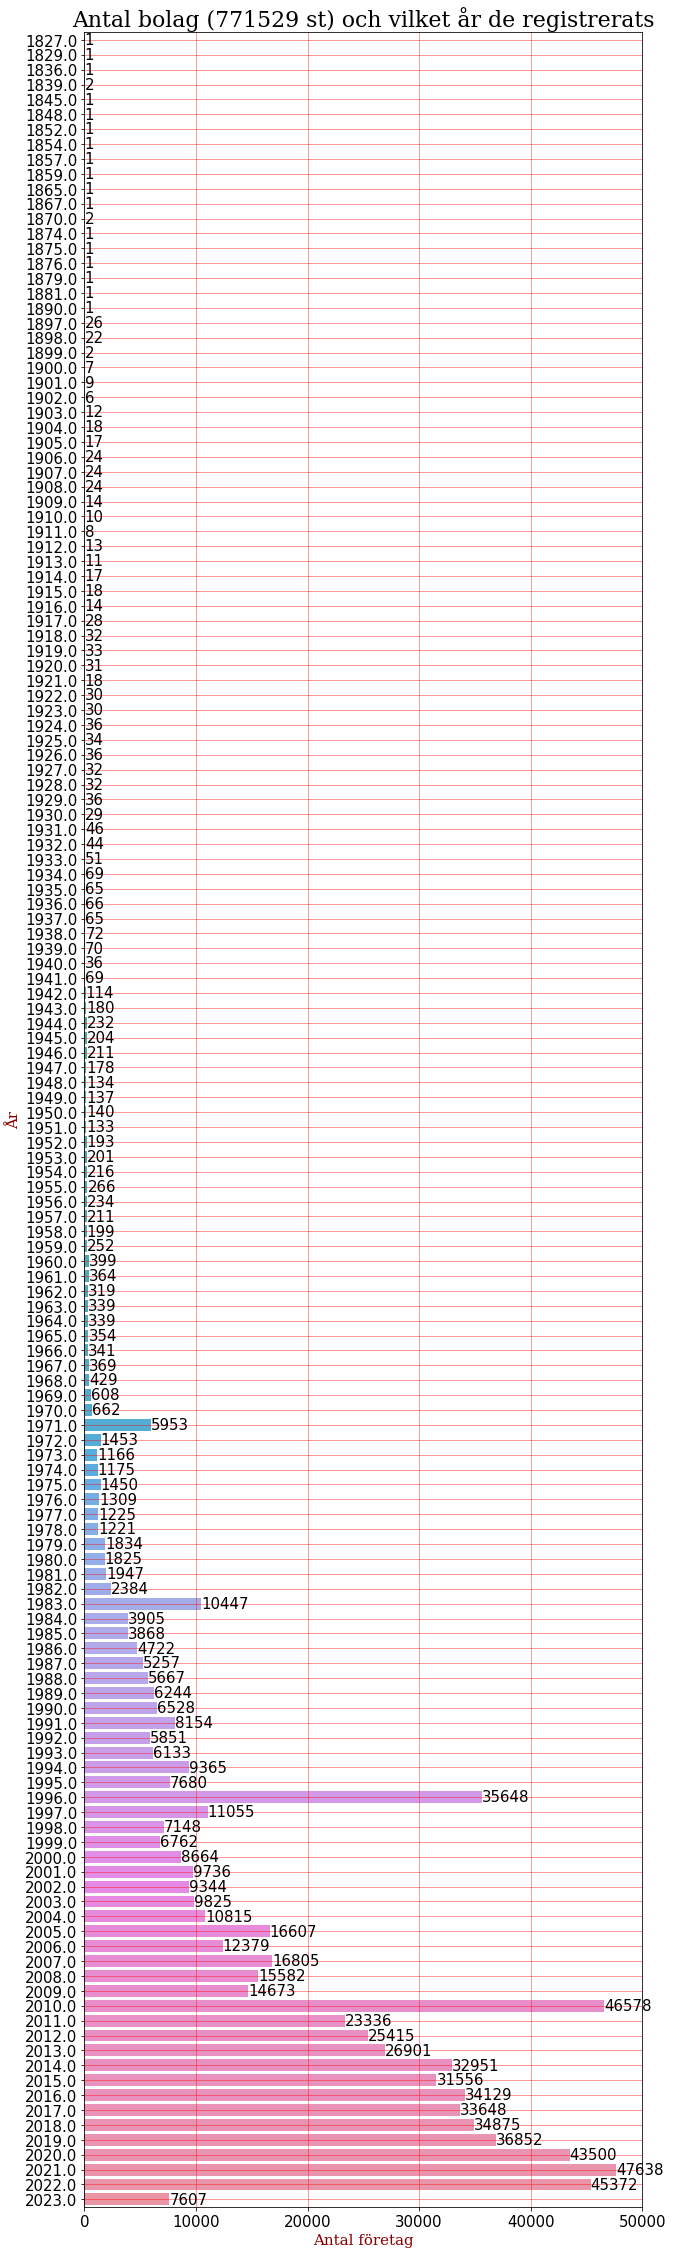

In [9]:


plt.figure(figsize=(10,40))
ax = sns.countplot(data = df , y = df["bolaget_registrerat"].dt.year)
plt.bar_label(ax.containers[0])
plt.ylabel("År", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title(f"Antal bolag ({df.bolaget_registrerat.count()} st) och vilket år de registrerats",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

In [10]:
df.loc[df["bolaget_registrerat"].dt.year < 1900]

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
14485,Aktiv,Avesta_kommun,AB Karl Hedin Emballage,556000-3047,Aktiebolag,010-,"010-457 80 02, ...",Box 84,775 26,Krylbo,...,NaN,281.777,305.228,316.582,337.292,328.470,303.203,425.002,NaN,https://www.bolagsfakta.se/5560003047-AB_Karl_...
59767,Aktiv,Eksjö_kommun,Wallnäs Aktiebolag,556002-5172,Aktiebolag,0496-,0496-508 00,Vallnäs,598 98,Mariannelund,...,NaN,0.000,0.000,0.000,0.000,0.000,0.000,581.702,NaN,https://www.bolagsfakta.se/5560025172-Wallnas_...
67388,Aktiv,Enköpings_kommun,Sparbanken i Enköping,517000-6505,Sparbank,0171-,"0171-853 00, ...",Box 912,745 25,Enköping,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,https://www.bolagsfakta.se/5170006505-Sparbank...
75622,Aktiv,Eskilstuna_kommun,KFUK-KFUM:s i Eskilstuna Fastighetsaktiebolag,556000-6628,Aktiebolag,016-,016-14 43 70,Kriebsensgatan 13,632 20,Eskilstuna,...,NaN,1.372,1.130,1.082,0.883,0.866,1.231,1.373,NaN,https://www.bolagsfakta.se/5560006628-KFUK_KFU...
87984,Aktiv,Falkenbergs_kommun,Berte Qvarnaktiebolag,556001-7781,Aktiebolag,0346-,"0346-71 52 00, ...",Berte,311 67,Slöinge,...,NaN,161.097,175.005,175.721,183.275,235.739,222.791,246.646,NaN,https://www.bolagsfakta.se/5560017781-Berte_Qv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715527,Aktiv,Ystads_kommun,Surbrunnsparken Ystad ek för,748000-1879,Ekonomisk förening,070-,070-747 64 77,Surbrunnsvägen 24,271 40,Ystad,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,https://www.bolagsfakta.se/7480001879-Surbrunn...
729085,Aktiv,Ängelholms_kommun,Byggnadsföreningen Folkets Hus i Ängelholm uta...,739400-0223,Ekonomisk förening,0431-,"0431-101 30, ...",Södra vägen 3-7,262 52,Ängelholm,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,https://www.bolagsfakta.se/7394000223-Byggnads...
738372,Aktiv,Åtvidabergs_kommun,Åtvidabergs Sparbank,522001-5886,Sparbank,0120-,"0120-840 00, ...",Box 246,597 26,Åtvidaberg,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,https://www.bolagsfakta.se/5220015886-Atvidabe...
756249,Aktiv,Östersunds_kommun,Växthuset i Ås Aktiebolag,556001-9399,Aktiebolag,070-,070-176 33 67,Storlienvägen 44,831 52,Östersund,...,NaN,0.939,1.043,1.548,1.375,1.379,1.765,1.259,NaN,https://www.bolagsfakta.se/5560019399-Vaxthuse...


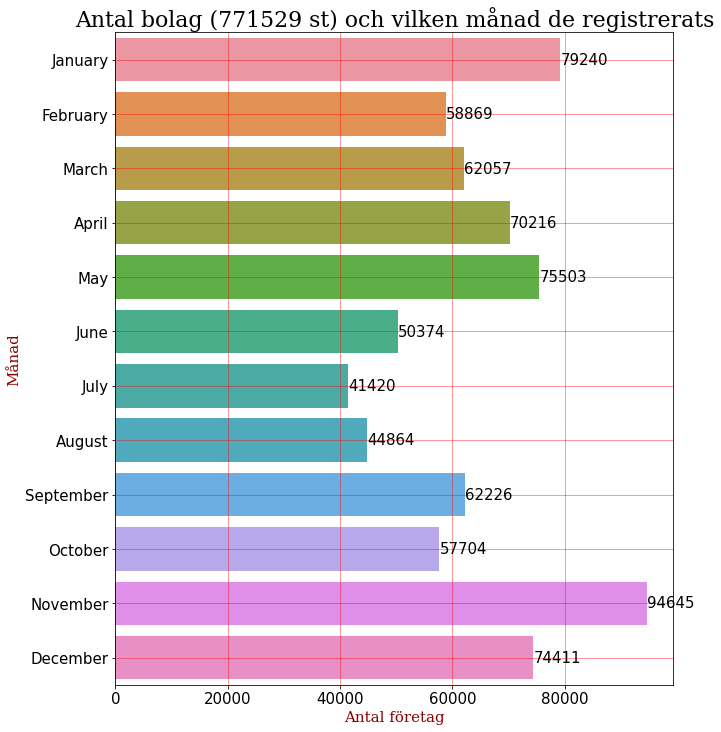

In [11]:
Months = ['January','February','March','April', 'May', 'June', 'July', 
          'August','September', 'October', 'November', 'December']

plt.figure(figsize=(10,12))
ax = sns.countplot(data = df , y = df["bolaget_registrerat"].dt.month_name(),order = Months)
plt.bar_label(ax.containers[0])
plt.ylabel("Månad", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title(f"Antal bolag ({df.bolaget_registrerat.count()} st) och vilken månad de registrerats",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

### Bolag som avvecklats

In [12]:
df_konkurs = df.loc[(df["status"] == "Konkurs avslutad") | (df["status"] == "Konkurs inledd")]
df_konkurs

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
0,Konkurs avslutad,Ale_kommun,MK Hytt & Transport AB,556932-9609,Aktiebolag,073-,073-941 50 56,Hult 545,449 90,Nol,...,NaN,4.021,5.595,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569329609-MK_Hytt_...
1,Konkurs avslutad,Ale_kommun,Ale Frukt & Grönt AB,556979-2509,Aktiebolag,0303-,0303-22 97 50,Nödingevägen 9,449 31,Nödinge,...,NaN,6.097,4.083,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569792509-Ale_Fruk...
2,Konkurs avslutad,Ale_kommun,Ale Torg nr 7 AB,556708-4552,Aktiebolag,-,-,Ale Torg 7,449 31,Nödinge,...,NaN,3.806,3.558,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567084552-Ale_Torg...
3,Konkurs avslutad,Ale_kommun,Verle Infra Consult AB,559107-0973,Aktiebolag,073-,073-066 76 18,Grimsäng 315,446 96,Hålanda,...,NaN,0.000,0.000,0.762,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5591070973-Verle_In...
137,Konkurs avslutad,Ale_kommun,Städresultat Sverige AB,559014-4316,Aktiebolag,-,-,Gåskullevägen 12,445 52,Surte,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,https://www.bolagsfakta.se/5590144316-Stadresu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771122,Konkurs avslutad,Övertorneå_kommun,Biologistic i Norr AB,556962-3902,Aktiebolag,-,-,c/o Birger Hegeström Strandvägen 47,957 93,Pello,...,NaN,0.334,3.234,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569623902-Biologis...
771139,Konkurs inledd,Övertorneå_kommun,JM Mode AB,559224-9394,Aktiebolag,072-,072-545 48 09,c/o Huppunen Matarengivägen 50,957 31,Övertorneå,...,NaN,0.000,0.000,0.000,0.000,0.000,0.0,0.831,NaN,https://www.bolagsfakta.se/5592249394-JM_Mode_AB
771216,Konkurs avslutad,Övertorneå_kommun,Övertorneå Fastighets AB,556816-6721,Aktiebolag,0927-,0927-103 50,Sockenvägen 1,957 31,Övertorneå,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5568166721-Overtorn...
771337,Konkurs avslutad,Övertorneå_kommun,Pullinki Mountain AB,559040-9123,Aktiebolag,076-,076-203 11 22,Svanstein 179,957 94,Övertorneå,...,NaN,0.000,2.482,3.451,3.995,2.992,NaN,NaN,NaN,https://www.bolagsfakta.se/5590409123-Pullinki...


In [13]:
df_ended = df.loc[df["status"]!= "Aktiv"]
df_ended

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
0,Konkurs avslutad,Ale_kommun,MK Hytt & Transport AB,556932-9609,Aktiebolag,073-,073-941 50 56,Hult 545,449 90,Nol,...,NaN,4.021,5.595,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569329609-MK_Hytt_...
1,Konkurs avslutad,Ale_kommun,Ale Frukt & Grönt AB,556979-2509,Aktiebolag,0303-,0303-22 97 50,Nödingevägen 9,449 31,Nödinge,...,NaN,6.097,4.083,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569792509-Ale_Fruk...
2,Konkurs avslutad,Ale_kommun,Ale Torg nr 7 AB,556708-4552,Aktiebolag,-,-,Ale Torg 7,449 31,Nödinge,...,NaN,3.806,3.558,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567084552-Ale_Torg...
3,Konkurs avslutad,Ale_kommun,Verle Infra Consult AB,559107-0973,Aktiebolag,073-,073-066 76 18,Grimsäng 315,446 96,Hålanda,...,NaN,0.000,0.000,0.762,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5591070973-Verle_In...
4,Likvidation avslutad,Ale_kommun,Gotentia Fastigheter AB,556759-5722,Aktiebolag,-,-,c/o Företagsbyrån i Ale AB Hålstensvägen 6,446 37,Älvängen,...,NaN,0.000,0.000,0.000,0.563,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567595722-Gotentia...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771480,Avregistrerad,Övertorneå_kommun,VI PÅ BYN,802489-6550,Ideell förening,-,-,c/o Åsa Alanentalo Björkvägen 25,957 32,Övertorneå,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/8024896550-VI_PA_BYN
771506,Avregistrerad,Övertorneå_kommun,MEÄN AKATEEMIA-ACADEMIA TORNEDALIENSIS,897600-4609,Ideell förening,070-,070-287 64 52,c/o SIW VANHATALO Aapua 45,957 94,Övertorneå,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/8976004609-MEAN_AKA...
771531,Avregistrerad,Övertorneå_kommun,VITTAMAA JAKTKLUBB,897601-0085,Ideell förening,-,-,c/o ERIK WÄLIKOSKI Övre Kuivakangas 505,957 92,Övertorneå,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/8976010085-VITTAMAA...
771537,Avregistrerad,Övertorneå_kommun,HAKKAS JAKTKLUBB,897900-6445,Ideell förening,-,-,c/o I HENRIKSSON Villavägen 11,957 32,Övertorneå,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,https://www.bolagsfakta.se/8979006445-HAKKAS_J...


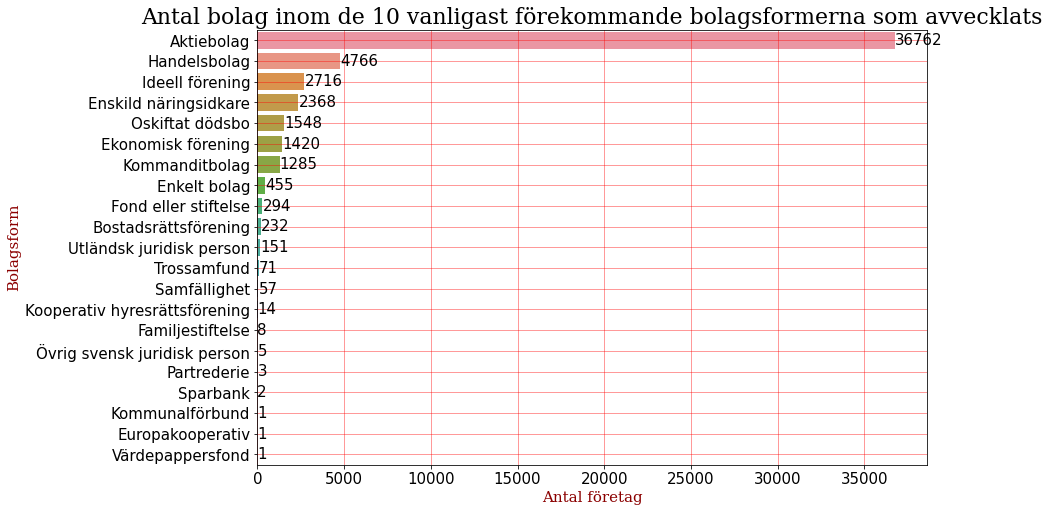

In [14]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = df_ended , y = "bolagsform",
                  order=df_ended.bolagsform.value_counts().index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("Bolagsform", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Antal bolag inom de 10 vanligast förekommande bolagsformerna som avvecklats",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

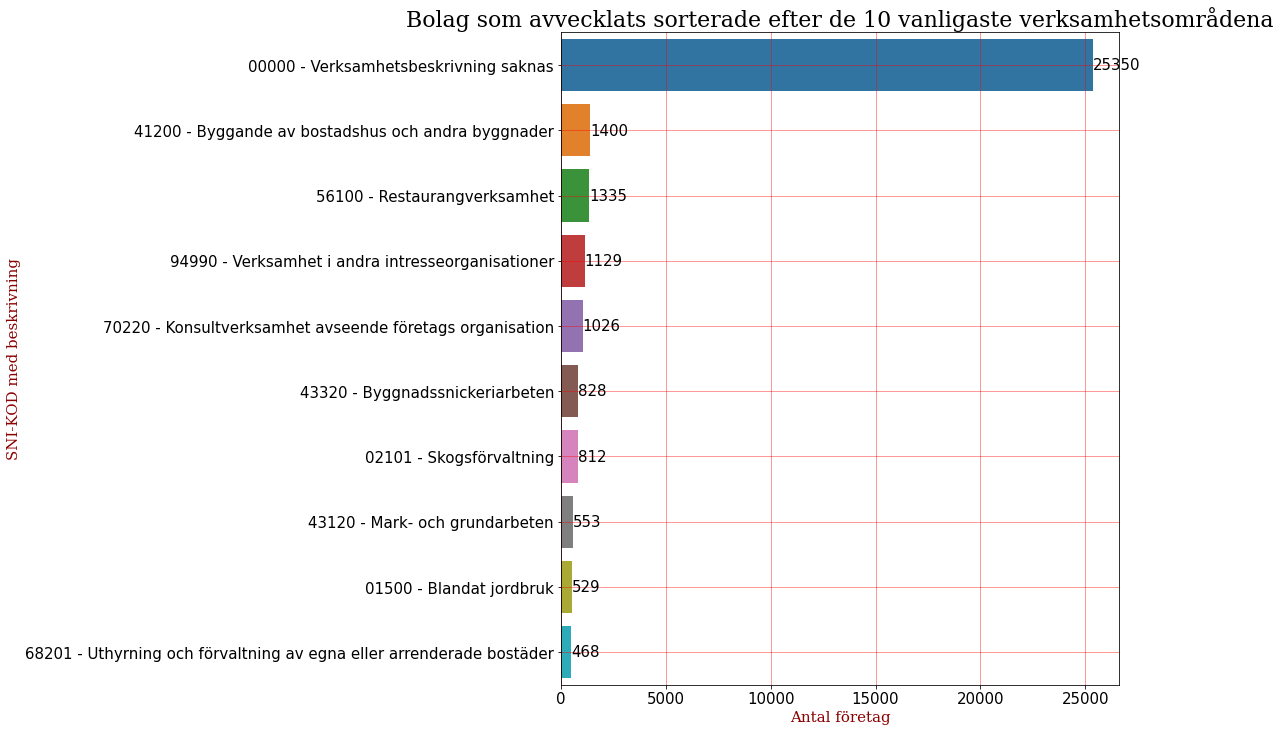

In [15]:


plt.figure(figsize=(10,12))
ax = sns.countplot(data = df_ended , y = "sni_beskrivning",
                  order=df_ended.sni_beskrivning.value_counts().iloc[:10].index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("SNI-KOD med beskrivning", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Bolag som avvecklats sorterade efter de 10 vanligaste verksamhetsområdena",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

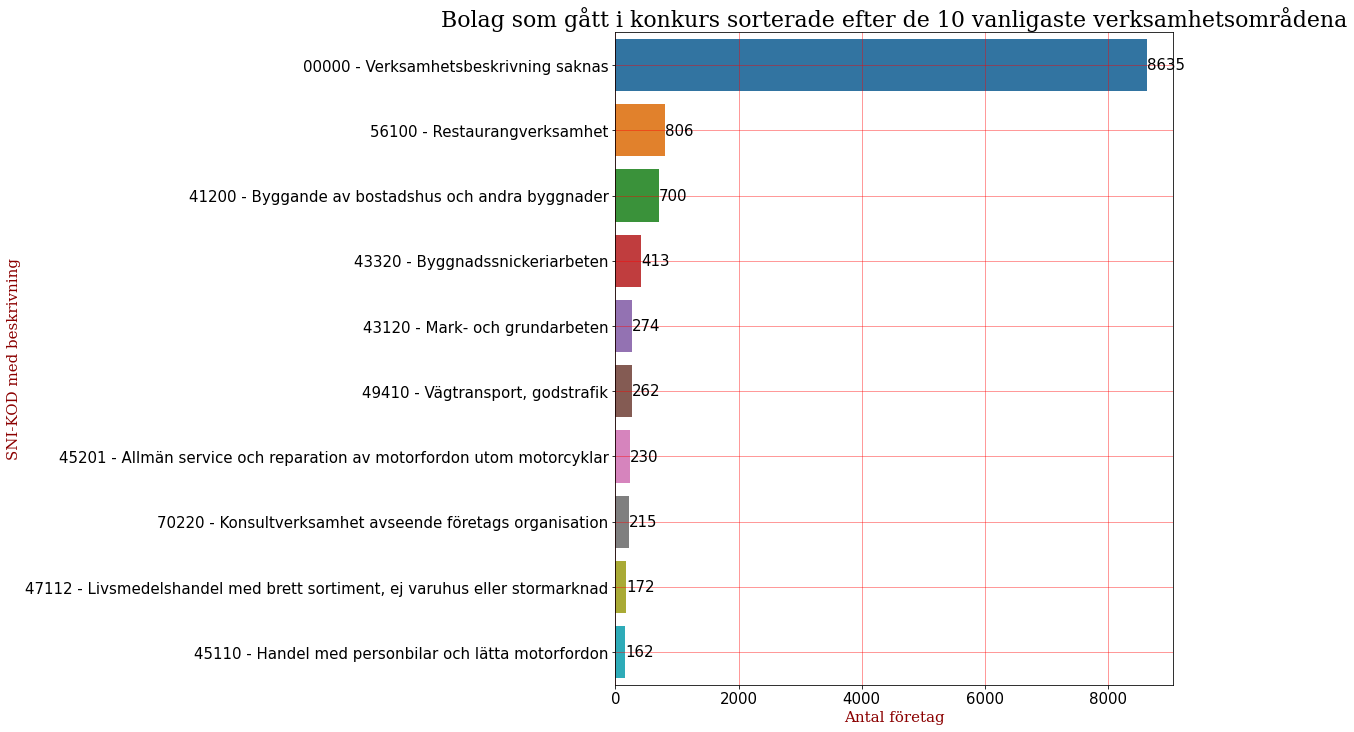

In [16]:
plt.figure(figsize=(10,12))
ax = sns.countplot(data = df_konkurs , y = "sni_beskrivning",
                  order=df_konkurs.sni_beskrivning.value_counts().iloc[:10].index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("SNI-KOD med beskrivning", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Bolag som gått i konkurs sorterade efter de 10 vanligaste verksamhetsområdena",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

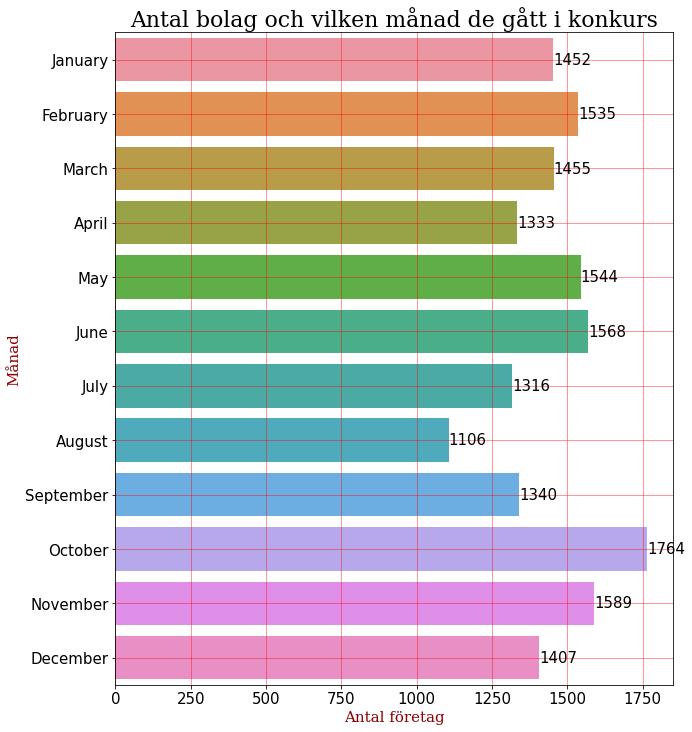

In [17]:
Months = ['January','February','March','April', 'May', 'June', 'July', 
          'August','September', 'October', 'November', 'December']

plt.figure(figsize=(10,12))
ax = sns.countplot(data = df_konkurs , y = df_konkurs["end_date"].dt.month_name(),order = Months)
plt.bar_label(ax.containers[0])
plt.ylabel("Månad", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Antal bolag och vilken månad de gått i konkurs",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

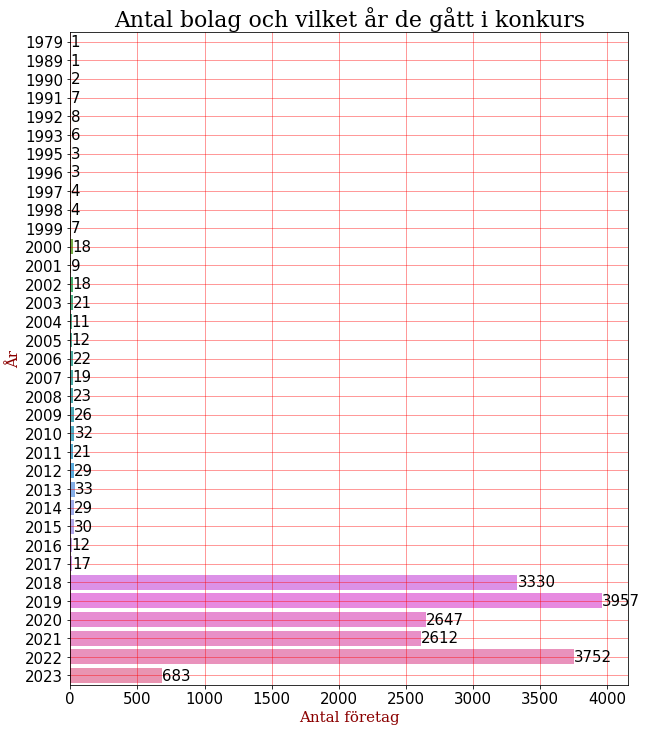

In [18]:
plt.figure(figsize=(10,12))
ax = sns.countplot(data = df_konkurs , y = df_konkurs["end_date"].dt.year)
plt.bar_label(ax.containers[0])
plt.ylabel("År", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Antal bolag och vilket år de gått i konkurs",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

In [19]:
bolags_ålder = (df_konkurs["end_date"].dt.year - df_konkurs["bolaget_registrerat"].dt.year)
print("Antal år aktiva innan avveckling")
print("Max:   ",bolags_ålder.max(), "years")
print("Mean:  ",bolags_ålder.mean(),"years")
print("Median:",bolags_ålder.median(),"years")
print("Mode:  ",bolags_ålder.mode()[0], "years")
print("Min:   ",bolags_ålder.min(), "years")

Antal år aktiva innan avveckling
Max:    117 years
Mean:   10.232408524326498 years
Median: 7.0 years
Mode:   4 years
Min:    0 years


In [20]:
df_konkurs.loc[bolags_ålder == bolags_ålder.max()]

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
712871,Konkurs avslutad,Ystads_kommun,Interdoor Aktiebolag,556004-7291,Aktiebolag,0411-,0411-138 40,Box 1510,271 00,Ystad,...,NaN,20.492,17.443,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5560047291-Interdoo...


In [21]:
bolagsålder_äldst = df_konkurs.loc[bolags_ålder == bolags_ålder.max(),["company_name", "bolaget_registrerat","end_date","status"]].squeeze()
bolagsålder_äldst

company_name           Interdoor Aktiebolag
bolaget_registrerat     1902-06-16 00:00:00
end_date                2019-08-08 00:00:00
status                     Konkurs avslutad
Name: 712871, dtype: object

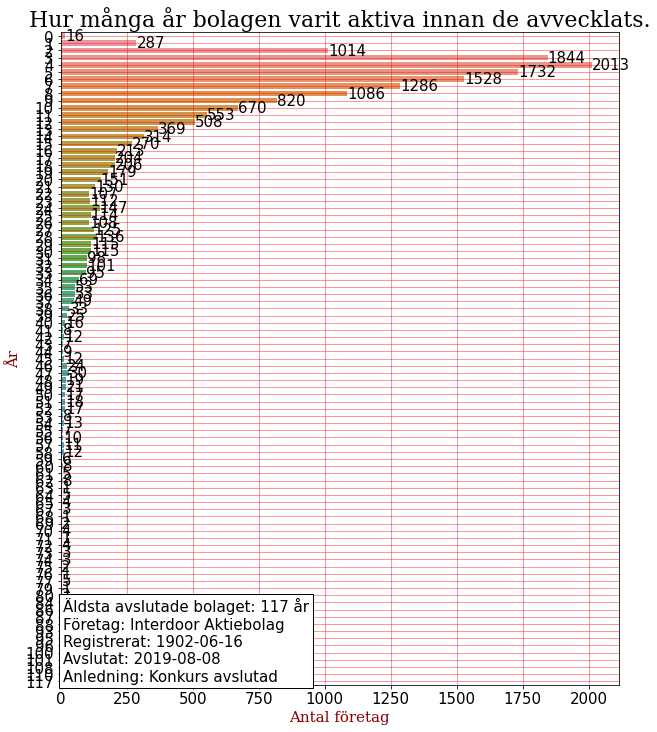

In [22]:
plt.figure(figsize=(10,12))
ax = sns.countplot(data = df_konkurs , y = bolags_ålder)
plt.bar_label(ax.containers[0])
plt.ylabel("År", fontdict=font2)
plt.xlabel("Antal företag", fontdict=font2)
plt.title("Hur många år bolagen varit aktiva innan de avvecklats.",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.ticklabel_format()
plt.grid()

y = bolags_ålder.nunique()
info_box = plt.annotate(f"Äldsta avslutade bolaget: {bolags_ålder.max()} år\nFöretag: {bolagsålder_äldst[0]}\nRegistrerat: {bolagsålder_äldst[1].date()}\nAvslutat: {bolagsålder_äldst[2].date()}\nAnledning: {bolagsålder_äldst[3]}", xy=(1,5), xytext=(10, y-1))
info_box.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
plt.show()

In [23]:
((df_konkurs["end_date"].dt.year - df_konkurs["bolaget_registrerat"].dt.year)).min()

0

## Exploring Box adreses

In [24]:
df.loc[df["adress"].str.contains("Box ")]

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
17,Aktiv,Ale_kommun,Kjell Stefan Invest AB,556699-8463,Aktiebolag,-,-,Box 40,446 21,Älvängen,...,NaN,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,https://www.bolagsfakta.se/5566998463-Kjell_St...
27,Aktiv,Ale_kommun,3-Stads Holding AB,556775-0087,Aktiebolag,-,-,Box 15,446 21,Älvängen,...,0.0,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.0,https://www.bolagsfakta.se/5567750087-3_Stads_...
59,Aktiv,Ale_kommun,Brattåsberget Fastighets AB,559117-0781,Aktiebolag,-,-,Box 2058,445 02,Surte,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,https://www.bolagsfakta.se/5591170781-Brattasb...
65,Aktiv,Ale_kommun,Barbro och Rune Sporre AB,559135-3395,Aktiebolag,-,-,Box 2058,445 02,Surte,...,NaN,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,https://www.bolagsfakta.se/5591353395-Barbro_o...
163,Aktiv,Ale_kommun,Ale El AB,559398-7026,Aktiebolag,-,-,Box 3004,449 14,Alafors,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,https://www.bolagsfakta.se/5593987026-Ale_El_AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771217,Aktiv,Övertorneå_kommun,"ANDERSSON, HANS LENNART",480724-XXXX,Enskild näringsidkare,0926-,0926-520 12,Box 15,957 21,ÖVERTORNEÅ,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,https://www.bolagsfakta.se/480724QXZC-ANDERSSO...
771358,Aktiv,Övertorneå_kommun,UTBILDNING NORD,897600-5044,Fond eller stiftelse,0927-,"0927-751 00, ...",Box 42,957 21,ÖVERTORNEÅ,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,https://www.bolagsfakta.se/8976005044-UTBILDNI...
771419,Aktiv,Övertorneå_kommun,TORNEDALENS MOTORSÄLLSKAP,897601-0127,Ideell förening,-,-,Box 60,957 21,ÖVERTORNEÅ,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,https://www.bolagsfakta.se/8976010127-TORNEDAL...
771439,Aktiv,Övertorneå_kommun,LR LOKALFÖRENING UTBILDNING NORD,802488-5090,Ideell förening,-,-,c/o UTBILDNING NORD Box 42,957 21,ÖVERTORNEÅ,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,https://www.bolagsfakta.se/8024885090-LR_LOKAL...


In [25]:
df.loc[df["adress"].str.contains("Box ")]["postnummer"].unique()

array(['446 21', '445 02', '449 14', ..., '956 22', '956 23', '957 21'],
      dtype=object)

In [26]:
df.loc[df["adress"].str.contains("Box ")]["postnummer"].nunique()

2415

In [27]:
df.loc[df["adress"].str.contains("Box ")]["postnummer"].unique()[0]

'446 21'

In [28]:
df.loc[df["postnummer"] == df.loc[df["adress"].str.contains("Box ")]["postnummer"].unique()[0]]

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
17,Aktiv,Ale_kommun,Kjell Stefan Invest AB,556699-8463,Aktiebolag,-,-,Box 40,446 21,Älvängen,...,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,https://www.bolagsfakta.se/5566998463-Kjell_St...
27,Aktiv,Ale_kommun,3-Stads Holding AB,556775-0087,Aktiebolag,-,-,Box 15,446 21,Älvängen,...,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,https://www.bolagsfakta.se/5567750087-3_Stads_...
173,Aktiv,Ale_kommun,Göran Thomas AB,559413-5872,Aktiebolag,-,-,Box 43,446 21,Älvängen,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5594135872-Goran_Th...
235,Aktiv,Ale_kommun,Ale Revisionsbyrå Kommanditbolag,916892-0040,Kommanditbolag,-,-,Box 2,446 21,Älvängen,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/9168920040-Ale_Revi...
1113,Aktiv,Ale_kommun,Ale Rör AB,556555-0018,Aktiebolag,0303-,"0303-74 94 95, ...",Box 40,446 21,Älvängen,...,NaN,16.876,20.141,14.275,16.458,23.461,17.290,19.177,NaN,https://www.bolagsfakta.se/5565550018-Ale_Ror_AB
1114,Aktiv,Ale_kommun,Lorensson VVS Teknik AB,556825-2075,Aktiebolag,076-,"076-833 74 01, ...",Box 43,446 21,Älvängen,...,0.978,4.038,3.885,3.761,4.297,4.572,9.155,9.287,10.321,https://www.bolagsfakta.se/5568252075-Lorensso...
1146,Aktiv,Ale_kommun,3-Stadsakustik AB,556590-0130,Aktiebolag,0303-,"0303-74 61 60, ...",Box 15,446 21,Älvängen,...,1.106,8.931,11.153,10.077,11.120,10.153,11.575,8.475,9.225,https://www.bolagsfakta.se/5565900130-3_Stadsa...
1652,Aktiv,Ale_kommun,Chaufför Och Bud Rätt Adress Express AB,559200-3965,Aktiebolag,070-,070-925 22 25,Box 42,446 21,Älvängen,...,0.384,0.000,0.000,0.000,0.000,0.000,19.267,22.959,24.969,https://www.bolagsfakta.se/5592003965-Chauffor...
1654,Aktiv,Ale_kommun,CobraGården Express AB,559341-1092,Aktiebolag,-,-,Box 42,446 21,Älvängen,...,0.430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14.102,https://www.bolagsfakta.se/5593411092-CobraGar...
1670,Aktiv,Ale_kommun,Cobragården Holding AB,559007-6302,Aktiebolag,-,-,Box 42,446 21,Älvängen,...,3.426,0.000,15.283,18.084,20.885,19.843,2.708,2.539,1.965,https://www.bolagsfakta.se/5590076302-Cobragar...


### Exploring phone numbers

In [29]:
df["riktnummer"].unique()

array(['073-', '0303-', '-', '072-', '031-', '070-', '0301-', '0302-',
       '076-', '0322-', '0520-', '0513-', '0304-', '0371-', '0370-',
       '0480-', '079-', '042-', '010-', '0522-', '08-', '011-', '0501-',
       '0155-', '0521-', '0300-', '020-', '0413-', '0523-', '0320-',
       '060-', '019-', '0510-', '0581-', '0498-', '0526-', '0346-',
       '063-', '0525-', '0511-', '0512-', '0122-', '033-', '0571-',
       '0383-', '0530-', '0506-', '0243-', '0570-', '0340-', '0321-',
       '0472-', '0248-', '013-', '0372-', '0470-', '0478-', '0476-',
       '016-', '0454-', '0393-', '0471-', '0474-', '071-', '0381-',
       '0457-', '0477-', '0451-', '0382-', '0325-', '0159-', '0431-',
       '0481-', '0142-', '040-', '075-', '0380-', '0456-', '090-', '046-',
       '0140-', '0390-', '036-', '0144-', '0485-', '0410-', '0589-',
       '0221-', '0176-', '0929-', '0960-', '0961-', '0981-', '0911-',
       '0918-', '0980-', '0978-', '0912-', '0672-', '0910-', '0150-',
       '0916-', '0573

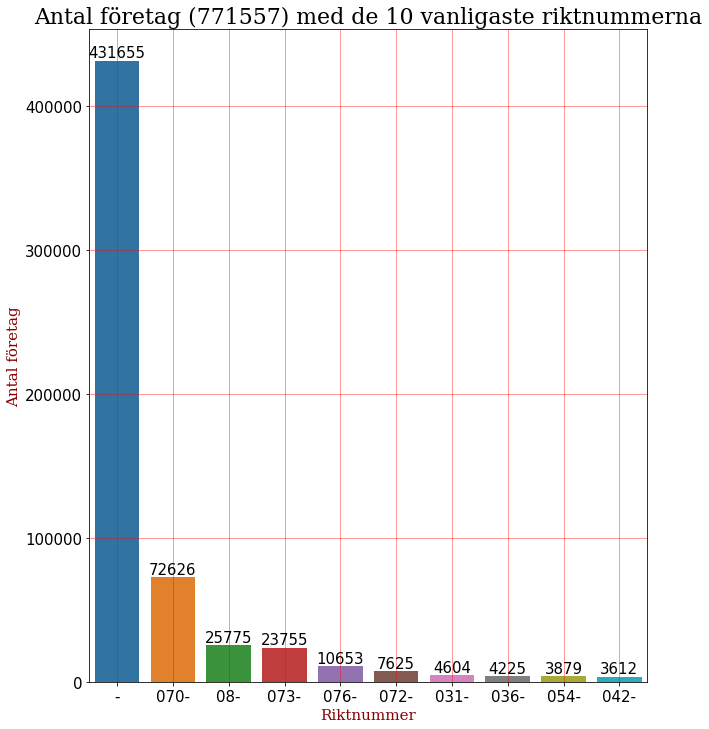

In [30]:
plt.figure(figsize=(10,12))
ax = sns.countplot(data = df , x = "riktnummer",
                  order=df.riktnummer.value_counts().iloc[:10].index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("Antal företag", fontdict=font2)
plt.xlabel("Riktnummer", fontdict=font2)

plt.title(f"Antal företag ({df.riktnummer.count()}) med de 10 vanligaste riktnummerna",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

In [31]:
df.head()

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
0,Konkurs avslutad,Ale_kommun,MK Hytt & Transport AB,556932-9609,Aktiebolag,073-,073-941 50 56,Hult 545,449 90,Nol,...,NaN,4.021,5.595,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569329609-MK_Hytt_...
1,Konkurs avslutad,Ale_kommun,Ale Frukt & Grönt AB,556979-2509,Aktiebolag,0303-,0303-22 97 50,Nödingevägen 9,449 31,Nödinge,...,NaN,6.097,4.083,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5569792509-Ale_Fruk...
2,Konkurs avslutad,Ale_kommun,Ale Torg nr 7 AB,556708-4552,Aktiebolag,-,-,Ale Torg 7,449 31,Nödinge,...,NaN,3.806,3.558,NaN,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567084552-Ale_Torg...
3,Konkurs avslutad,Ale_kommun,Verle Infra Consult AB,559107-0973,Aktiebolag,073-,073-066 76 18,Grimsäng 315,446 96,Hålanda,...,NaN,0.000,0.000,0.762,NaN,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5591070973-Verle_In...
4,Likvidation avslutad,Ale_kommun,Gotentia Fastigheter AB,556759-5722,Aktiebolag,-,-,c/o Företagsbyrån i Ale AB Hålstensvägen 6,446 37,Älvängen,...,NaN,0.000,0.000,0.000,0.563,NaN,NaN,NaN,NaN,https://www.bolagsfakta.se/5567595722-Gotentia...


# Exploring results

In [32]:
df.resultat_2022.sum()

83019.13599999998

In [33]:
df_resultat  = df[["company_name","resultat_2015","resultat_2016","resultat_2017","resultat_2018","resultat_2019","resultat_2020","resultat_2021","resultat_2022"]].melt("company_name", var_name = "year", value_name = "resultat")
df_resultat["year"] = df_resultat["year"].str.replace("resultat_", "")
df_resultat["year"] = pd.to_datetime(df_resultat["year"], format="%Y")
df_resultat["resultat"] = df_resultat["resultat"] * 1000000
df_resultat

,company_name,year,resultat
0,MK Hytt & Transport AB,2015-01-01,-405000.0
1,Ale Frukt & Grönt AB,2015-01-01,-10000.0
2,Ale Torg nr 7 AB,2015-01-01,9000.0
3,Verle Infra Consult AB,2015-01-01,0.0
4,Gotentia Fastigheter AB,2015-01-01,-7000.0
...,...,...,...
6172451,"LEJON, ÖSTEN",2022-01-01,0.0
6172452,synska agnes,2022-01-01,0.0
6172453,"Valencia, Penelope",2022-01-01,0.0
6172454,"ÖHMAN, MARIA",2022-01-01,0.0


In [34]:
df_resultat = df_resultat.sort_values(by = "resultat",ascending = False ).head(20)

df_resultat

,company_name,year,resultat
3571947,Valutec Group AB,2019-01-01,5.151980e+10
4730230,Kinnevik Internet 1 AB,2021-01-01,4.539677e+10
2294653,Frilufts Retail Europe AB,2017-01-01,3.289089e+10
5148023,Melker Schörling Tjänste AB,2021-01-01,3.159700e+10
3604909,Melker Schörling Tjänste AB,2019-01-01,2.001100e+10
4376466,Melker Schörling Tjänste AB,2020-01-01,1.866300e+10
3186323,Millcellvik AB,2019-01-01,1.221339e+10
4068686,Sveaskog AB,2020-01-01,1.086700e+10
2061795,Melker Schörling Tjänste AB,2017-01-01,1.024800e+10
3958673,Kinnevik Internet 1 AB,2020-01-01,5.585245e+09


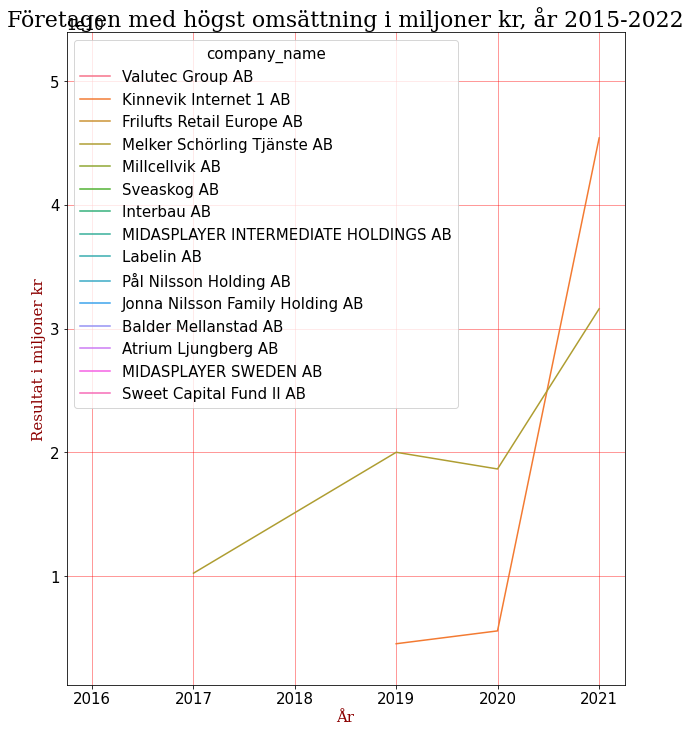

In [35]:
plt.figure(figsize=(10,12))
ax = sns.lineplot(data = df_resultat ,y = "resultat", x = df_resultat["year"]  ,hue = "company_name")
plt.ylabel("Resultat i miljoner kr", fontdict=font2)
plt.xlabel("År", fontdict=font2)

plt.title(f"Företagen med högst omsättning i miljoner kr, år 2015-2022",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

In [36]:
df.loc[df.resultat_2022 == df.resultat_2022.max()]

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
113306,Aktiv,Gislaveds_kommun,Weland Holding AB,556259-5818,Aktiebolag,0433-,0433-712 50,c/o Weland AB Malmgatan 34,333 30,Smålandsstenar,...,2255.734,0.0,0.0,0.0,2122.878,2447.261,2448.661,2444.319,3389.591,https://www.bolagsfakta.se/5562595818-Weland_H...


In [37]:
df_resultat_largest10 = df.nlargest(10, columns= "resultat_2022")
df_resultat_largest10

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
113306,Aktiv,Gislaveds_kommun,Weland Holding AB,556259-5818,Aktiebolag,0433-,0433-712 50,c/o Weland AB Malmgatan 34,333 30,Smålandsstenar,...,2255.734,0.000,0.000,0.000,2122.878,2447.261,2448.661,2444.319,3389.591,https://www.bolagsfakta.se/5562595818-Weland_H...
113340,Aktiv,Gislaveds_kommun,Husleden Förvaltning AB,556920-6765,Aktiebolag,-,-,c/o Weland AB Malmgatan 34,333 30,Smålandsstenar,...,2005.274,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5569206765-Husleden...
386349,Aktiv,Nacka_kommun,Kojak Stockholm AB,559292-6405,Aktiebolag,-,-,c/o Emil Svärd Strandpromenaden 10 131 50 Sa,ltsjö-,Duvnäs,...,1343.787,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5592926405-Kojak_St...
523965,Aktiv,Stockholms_kommun,Bas Invest IV AB,556918-4194,Aktiebolag,-,-,c/o Convendum (Bas Invest AB) Nybrogatan 17,114 39,Stockholm,...,811.697,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5569184194-Bas_Inve...
647213,Aktiv,Umeå_kommun,BRP Sweden AB,556353-7413,Aktiebolag,090-,"090-17 28 20, ...",Spinnvägen 15,903 61,Umeå,...,777.642,41.726,38.993,47.513,51.569,59.695,62.651,49.205,57.082,https://www.bolagsfakta.se/5563537413-BRP_Swed...
7739,Aktiv,Alvesta_kommun,ATA Holding Sweden AB,556582-1781,Aktiebolag,0472-,0472-361 00,Storgatan 17,342 60,Moheda,...,664.564,0.000,0.000,0.000,1594.063,1862.138,1812.763,2064.345,2800.714,https://www.bolagsfakta.se/5565821781-ATA_Hold...
543501,Aktiv,Sundbybergs_kommun,ROMGIL Holding AB,559251-3989,Aktiebolag,-,-,c/o Wasberg Redovisning AB Box 1235,172 24,Sundbyberg,...,652.090,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.117,https://www.bolagsfakta.se/5592513989-ROMGIL_H...
523610,Aktiv,Stockholms_kommun,Rellaceurt Holding AB,559405-5591,Aktiebolag,-,-,c/o GotYourBack AB Linnégatan 18,114 47,Stockholm,...,605.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5594055591-Rellaceu...
489388,Aktiv,Skinnskattebergs_kommun,Systemair Aktiebolag,556160-4108,Aktiebolag,0222-,"0222-440 00, ...",Industrivägen 3,739 30,Skinnskatteberg,...,544.000,0.000,0.000,0.000,7316.100,8341.400,9083.000,8715.000,9869.000,https://www.bolagsfakta.se/5561604108-Systemai...
387819,Aktiv,Nacka_kommun,Dustin Group AB,556703-3062,Aktiebolag,08-,08-553 440 00,Box 1194 131 27,Nacka,Strand,...,478.000,0.000,0.000,0.000,10300.500,12543.300,13210.000,15892.000,23622.000,https://www.bolagsfakta.se/5567033062-Dustin_G...


In [38]:
df_resultat_largest10_melt  = df_resultat_largest10[["company_name","resultat_2017","resultat_2018","resultat_2019","resultat_2020","resultat_2021","resultat_2022"]].melt("company_name", var_name = "year", value_name = "resultat")
df_resultat_largest10_melt["year"] = df_resultat_largest10_melt["year"].str.replace("resultat_", "")
df_resultat_largest10_melt

,company_name,year,resultat
0,Weland Holding AB,2017,0.000
1,Husleden Förvaltning AB,2017,63.276
2,Kojak Stockholm AB,2017,0.000
3,Bas Invest IV AB,2017,-0.020
4,BRP Sweden AB,2017,12.996
5,ATA Holding Sweden AB,2017,0.000
6,ROMGIL Holding AB,2017,0.000
7,Rellaceurt Holding AB,2017,0.000
8,Systemair Aktiebolag,2017,0.000
9,Dustin Group AB,2017,0.000


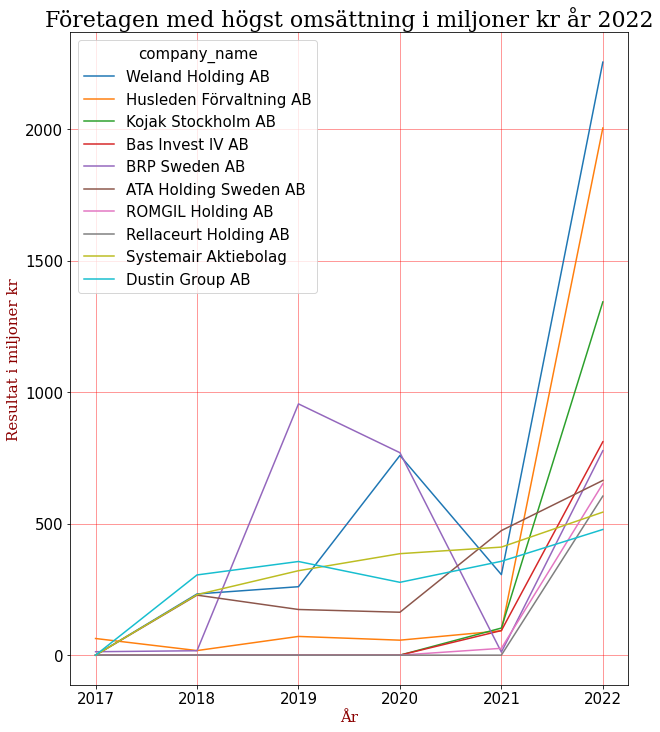

In [39]:
plt.figure(figsize=(10,12))
ax = sns.lineplot(data = df_resultat_largest10_melt ,y = "resultat", x = "year"  ,hue = "company_name")
plt.ylabel("Resultat i miljoner kr", fontdict=font2)
plt.xlabel("År", fontdict=font2)

plt.title(f"Företagen med högst omsättning i miljoner kr år 2022",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()

In [40]:
df.nsmallest(10, columns= "resultat_2022")

,status,kommun,company_name,org_number,bolagsform,riktnummer,phone_number,adress,postnummer,postort,...,resultat_2022,omsattning_2015,omsattning_2016,omsattning_2017,omsattning_2018,omsattning_2019,omsattning_2020,omsattning_2021,omsattning_2022,url
520567,Aktiv,Stockholms_kommun,Pure Crowns Sweden Holding AB,559197-9942,Aktiebolag,-,-,c/o Baker & McKenzie Advokatbyrå KB Box 180,101 23,Stockholm,...,-545.103,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.054,https://www.bolagsfakta.se/5591979942-Pure_Cro...
42615,Fusion inledd,Botkyrka_kommun,Fastighets Aktiebolaget Snatteranden,556402-3637,Aktiebolag,08-,08-530 343 45,Segersbyvägen 3B,145 63,Norsborg,...,-159.482,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.350,https://www.bolagsfakta.se/5564023637-Fastighe...
639425,Aktiv,Umeå_kommun,Nomis i Norrtälje AB,559318-6330,Aktiebolag,-,-,Storgatan 28 L,903 21,Umeå,...,-154.588,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5593186330-Nomis_i_...
501804,Aktiv,Sollentuna_kommun,Beijer Byggmaterial Aktiebolag,556012-5220,Aktiebolag,075-,075-241 10 00,Box 798,191 27,Sollentuna,...,-121.719,5205.242,5426.512,5397.638,5727.394,6587.140,7333.476,8304.485,10168.416,https://www.bolagsfakta.se/5560125220-Beijer_B...
616304,Aktiv,Tyresö_kommun,Choki AB,559074-7720,Aktiebolag,020-,"020-41 41 11, ...",c/o CGM Ekonomi AB Box 316,135 29,Tyresö,...,-114.067,0.000,0.000,0.778,2.477,4.727,NaN,2.905,4.099,https://www.bolagsfakta.se/5590747720-Choki_AB
303377,Aktiv,Lidingö_kommun,Steelmar Scandinavia AB,556619-5003,Aktiebolag,031-,031-81 11 19,Grönstavägen 20,181 43,Lidingö,...,-108.095,0.784,0.574,0.712,0.592,0.712,0.742,0.713,0.127,https://www.bolagsfakta.se/5566195003-Steelmar...
471483,Aktiv,Simrishamns_kommun,Transistormedia AB,556439-1521,Aktiebolag,073-,073-316 74 12,Gärsnäs slottsväg 4,272 96,Gärsnäs,...,-90.280,0.000,0.000,0.000,1.194,12.948,6.027,0.576,0.000,https://www.bolagsfakta.se/5564391521-Transist...
113307,Aktiv,Gislaveds_kommun,WELAND VÄRDEPAPPER Aktiebolag,556271-4286,Aktiebolag,-,-,c/o Weland AB Malmgatan 34,333 30,Smålandsstenar,...,-52.839,424.127,0.000,3.706,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5562714286-WELAND_V...
571819,Likvidation beslutad,Södertälje_kommun,Fjord Advisors AB,556820-8200,Aktiebolag,08-,08-21 21 05,c/o RHS Bolag AB Box 2074,151 02,Södertälje,...,-48.919,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5568208200-Fjord_Ad...
526987,Aktiv,Stockholms_kommun,Ronäs Holding AB,559048-8739,Aktiebolag,-,-,c/o Mecon Bostad AB Lindetorpsvägen 11,121 63,Johanneshov,...,-46.195,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,https://www.bolagsfakta.se/5590488739-Ronas_Ho...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771557 entries, 0 to 771556
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   status               771557 non-null  object        
 1   kommun               771557 non-null  object        
 2   company_name         771557 non-null  object        
 3   org_number           771557 non-null  object        
 4   bolagsform           771557 non-null  object        
 5   riktnummer           771557 non-null  object        
 6   phone_number         771557 non-null  object        
 7   adress               771557 non-null  object        
 8   postnummer           771557 non-null  object        
 9   postort              771557 non-null  object        
 10  sni_kod              770100 non-null  object        
 11  sni_beskrivning      770100 non-null  object        
 12  bolaget_registrerat  771529 non-null  datetime64[ns]
 13  end_date      

In [42]:
df_anstallda  = df[["company_name","anstallda_2015","anstallda_2016","anstallda_2017","anstallda_2018","anstallda_2019","anstallda_2020","anstallda_2021","anstallda_2022"]].melt("company_name", var_name = "year", value_name = "anställda")
df_anstallda["year"] = df_anstallda["year"].str.replace("anstallda_", "")
df_anstallda["year"] = pd.to_datetime(df_anstallda["year"], format="%Y")
df_anstallda

,company_name,year,anställda
0,MK Hytt & Transport AB,2015-01-01,2.0
1,Ale Frukt & Grönt AB,2015-01-01,3.0
2,Ale Torg nr 7 AB,2015-01-01,3.0
3,Verle Infra Consult AB,2015-01-01,0.0
4,Gotentia Fastigheter AB,2015-01-01,0.0
...,...,...,...
6172451,"LEJON, ÖSTEN",2022-01-01,0.0
6172452,synska agnes,2022-01-01,0.0
6172453,"Valencia, Penelope",2022-01-01,0.0
6172454,"ÖHMAN, MARIA",2022-01-01,0.0


In [43]:
df_anstallda.loc[df_anstallda["year"] == "2022-01-01"].sort_values(by = "anställda", ascending= False).head(10)

,company_name,year,anställda
5890287,Systemair Aktiebolag,2022-01-01,6358.0
5788718,Dustin Group AB,2022-01-01,2424.0
5902703,Beijer Byggmaterial Aktiebolag,2022-01-01,1928.0
5420144,Ahlberg-Dollarstore AB,2022-01-01,1297.0
5514205,Weland Holding AB,2022-01-01,988.0
5674361,Jan Vikström Holding AB,2022-01-01,949.0
5811132,Lärandegruppen i Sverige AB,2022-01-01,891.0
6046053,Komatsu Forest AB,2022-01-01,648.0
5983675,Mio AB,2022-01-01,635.0
5883227,Wipro Infrastructure Engineering AB,2022-01-01,630.0


In [44]:
df_anstallda.loc[df_anstallda["year"] == "2021-01-01"].sort_values(by = "anställda", ascending= False).head(10)

,company_name,year,anställda
4980402,NIBE Industrier AB,2021-01-01,20455.0
4971829,Verisure Topholding AB,2021-01-01,20233.0
5153584,Landstingshuset i Stockholm Aktiebolag,2021-01-01,13636.0
5118730,Systemair Aktiebolag,2021-01-01,5864.0
4835112,Nefab Holding AB,2021-01-01,3643.0
5156778,Berghamnen AB,2021-01-01,3327.0
4668959,Autocirc Group AB (publ),2021-01-01,3278.0
5208294,Bearsons AB,2021-01-01,3137.0
5208342,Brado AB (publ),2021-01-01,3018.0
5104851,KJB Holding AB,2021-01-01,2933.0


In [45]:
df_anstallda.loc[df_anstallda["year"] == "2020-01-01"].sort_values(by = "anställda", ascending= False).head(10)

,company_name,year,anställda
4208845,NIBE Industrier AB,2020-01-01,18740.0
4382027,Landstingshuset i Stockholm Aktiebolag,2020-01-01,13444.0
4347173,Systemair Aktiebolag,2020-01-01,5965.0
4384262,Niam Fond VI BL AB,2020-01-01,5344.0
4243312,VR Sverige AB,2020-01-01,3428.0
4481595,Internationella Engelska Skolan i Sverige Hold...,2020-01-01,3381.0
4436737,Bearsons AB,2020-01-01,3281.0
4063555,Nefab Holding AB,2020-01-01,3193.0
4436785,Brado AB (publ),2020-01-01,3164.0
4484652,Internationella Engelska Skolan i Sverige AB,2020-01-01,3053.0


In [46]:
df_anstallda.loc[df_anstallda["year"] == "2019-01-01"].sort_values(by = "anställda", ascending= False).head(10)

,company_name,year,anställda
3437288,NIBE Industrier AB,2019-01-01,16994.0
3610470,Landstingshuset i Stockholm Aktiebolag,2019-01-01,13398.0
3575616,Systemair Aktiebolag,2019-01-01,5672.0
3696825,National Electric Vehicle Sweden AB,2019-01-01,3925.0
3471755,VR Sverige AB,2019-01-01,3777.0
3665180,Bearsons AB,2019-01-01,3292.0
3294721,ITAB Shop Concept AB,2019-01-01,3247.0
3665228,Brado AB (publ),2019-01-01,3165.0
3710038,Internationella Engelska Skolan i Sverige Hold...,2019-01-01,3028.0
3291998,Nefab Holding AB,2019-01-01,2931.0


In [47]:
df_anstallda.loc[df_anstallda["year"] == "2018-01-01"].sort_values(by = "anställda", ascending= False).head(10)

,company_name,year,anställda
2665731,NIBE Industrier AB,2018-01-01,16569.0
2838913,Landstingshuset i Stockholm Aktiebolag,2018-01-01,13043.0
2804059,Systemair Aktiebolag,2018-01-01,5249.0
2893623,Bearsons AB,2018-01-01,3678.0
2893671,Brado AB (publ),2018-01-01,3560.0
2523164,ITAB Shop Concept AB,2018-01-01,3384.0
2520441,Nefab Holding AB,2018-01-01,2910.0
2700198,VR Sverige AB,2018-01-01,2786.0
2815264,Ragn-Sellsföretagen AB,2018-01-01,2672.0
2614853,Torsten Jansson Holding AB,2018-01-01,2605.0


In [48]:
df_anstallda.loc[df_anstallda["anställda"] > 300]

,company_name,year,anställda
19245,Ahlberg-Dollarstore AB,2015-01-01,380.0
24020,Inre Kraft i Norr AB,2015-01-01,405.0
25592,Flügger Sweden AB,2015-01-01,492.0
42088,DeLaval International AB,2015-01-01,756.0
50567,JYSK AB,2015-01-01,1077.0
...,...,...,...
6027742,TP Förskolor AB,2022-01-01,349.0
6046053,Komatsu Forest AB,2022-01-01,648.0
6089863,Fridaskolorna AB,2022-01-01,522.0
6089944,Frida Utbildning AB,2022-01-01,524.0


In [49]:
pd.DatetimeIndex(df_anstallda["year"]).year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='year', length=6172456)

In [50]:
df_anstallda_250 = df_anstallda.loc[df_anstallda["anställda"] > 250].sort_values("anställda", ascending = False)
df_anstallda_250

,company_name,year,anställda
4980402,NIBE Industrier AB,2021-01-01,20455.0
4971829,Verisure Topholding AB,2021-01-01,20233.0
4208845,NIBE Industrier AB,2020-01-01,18740.0
3437288,NIBE Industrier AB,2019-01-01,16994.0
2665731,NIBE Industrier AB,2018-01-01,16569.0
...,...,...,...
2592041,Kungälvs Rörläggeri Aktiebolag,2018-01-01,251.0
1898335,Hedenberg A.V.D. Fastighets Aktiebolag,2017-01-01,251.0
4306079,Partner Partner Partner Sverige Norge AB,2020-01-01,251.0
3502201,Royal Design Group Holding AB,2019-01-01,251.0


In [51]:
df.loc[df.sni_kod != "00000"].groupby("kommun")["sni_kod"].value_counts()

kommun             sni_kod
Ale_kommun         02101      179
                   01500      136
                   94990      132
                   68209      106
                   70220       94
                             ... 
Övertorneå_kommun  86909        1
                   90020        1
                   93112        1
                   93119        1
                   93290        1
Name: sni_kod, Length: 58511, dtype: int64

In [52]:
df.loc[df.sni_kod != "00000"].groupby("kommun")["sni_beskrivning"].value_counts().unstack()

sni_beskrivning,"01110 - Odling av spannmål (utom ris), baljväxter och oljeväxter",01131 - Potatisodling,01132 - Sockerbetsodling,01133 - Odling av grönsaker (köksväxter) på friland,01134 - Odling av grönsaker (köksväxter) i växthus,01135 - Svampodling m.m.,01150 - Odling av tobak,01160 - Odling av fiberväxter,01191 - Odling av prydnadsväxter i växthus,01199 - Odling av övriga ett- och tvååriga växter,...,95240 - Reparation av möbler och heminredning,95250 - Reparation av ur och guldsmedsvaror,95290 - Reparation av andra hushållsartiklar och personliga artiklar,96011 - Industri- och institutionstvätt,96012 - Konsumenttvätt,96021 - Hårvård,96022 - Skönhetsvård,96030 - Begravningsverksamhet,96040 - Kroppsvård,96090 - Övriga konsumenttjänster
kommun,,,,,,,,,,,,,,,,,,,,,
Ale_kommun,20.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,30.0,...,1.0,NaN,1.0,NaN,NaN,39.0,27.0,2.0,40.0,20.0
Alingsås_kommun,56.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alvesta_kommun,4.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,23.0,...,NaN,NaN,3.0,NaN,NaN,24.0,5.0,3.0,25.0,12.0
Aneby_kommun,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,17.0,...,2.0,NaN,3.0,1.0,NaN,13.0,3.0,NaN,8.0,3.0
Arjeplogs_kommun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,4.0,3.0,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Österåkers_kommun,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Östhammars_kommun,40.0,NaN,NaN,4.0,2.0,NaN,NaN,NaN,3.0,38.0,...,2.0,1.0,NaN,NaN,NaN,28.0,5.0,1.0,39.0,27.0
Östra_Göinge_kommun,7.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,1.0,14.0,...,2.0,NaN,3.0,NaN,NaN,24.0,6.0,4.0,16.0,14.0


In [53]:
df.loc[df.sni_kod == "02101"].groupby("kommun")["sni_beskrivning"].value_counts()

kommun               sni_beskrivning         
Ale_kommun           02101 - Skogsförvaltning    179
Alingsås_kommun      02101 - Skogsförvaltning    477
Alvesta_kommun       02101 - Skogsförvaltning    770
Aneby_kommun         02101 - Skogsförvaltning    258
Arjeplogs_kommun     02101 - Skogsförvaltning    201
                                                ... 
Österåkers_kommun    02101 - Skogsförvaltning    164
Östhammars_kommun    02101 - Skogsförvaltning    288
Östra_Göinge_kommun  02101 - Skogsförvaltning    238
Överkalix_kommun     02101 - Skogsförvaltning    246
Övertorneå_kommun    02101 - Skogsförvaltning    289
Name: sni_beskrivning, Length: 258, dtype: int64

In [54]:
vanligast_verksamhet = df.loc[df.sni_kod != "00000"].groupby("kommun")["sni_beskrivning"].value_counts().unstack().idxmax(axis=1)
vanligast_verksamhet

kommun
Ale_kommun                                      02101 - Skogsförvaltning
Alingsås_kommun                                 02101 - Skogsförvaltning
Alvesta_kommun                                  02101 - Skogsförvaltning
Aneby_kommun                                    02101 - Skogsförvaltning
Arjeplogs_kommun                                02101 - Skogsförvaltning
                                             ...                        
Österåkers_kommun      70220 - Konsultverksamhet avseende företags or...
Östhammars_kommun                               02101 - Skogsförvaltning
Östra_Göinge_kommun                             02101 - Skogsförvaltning
Överkalix_kommun                                02101 - Skogsförvaltning
Övertorneå_kommun                               02101 - Skogsförvaltning
Length: 260, dtype: object

In [85]:
vanligaste_sni_per_kommun = pd.DataFrame(vanligast_verksamhet)
vanligaste_sni_per_kommun

,0
kommun,
Ale_kommun,02101 - Skogsförvaltning
Alingsås_kommun,02101 - Skogsförvaltning
Alvesta_kommun,02101 - Skogsförvaltning
Aneby_kommun,02101 - Skogsförvaltning
Arjeplogs_kommun,02101 - Skogsförvaltning
...,...
Österåkers_kommun,70220 - Konsultverksamhet avseende företags or...
Östhammars_kommun,02101 - Skogsförvaltning
Östra_Göinge_kommun,02101 - Skogsförvaltning


In [86]:
vanligaste_sni_per_kommun.head(20)

,0
kommun,
Ale_kommun,02101 - Skogsförvaltning
Alingsås_kommun,02101 - Skogsförvaltning
Alvesta_kommun,02101 - Skogsförvaltning
Aneby_kommun,02101 - Skogsförvaltning
Arjeplogs_kommun,02101 - Skogsförvaltning
Arvidsjaurs_kommun,02101 - Skogsförvaltning
Askersunds_kommun,02101 - Skogsförvaltning
Avesta_kommun,02101 - Skogsförvaltning
Bengtsfors_kommun,02101 - Skogsförvaltning


In [87]:
vanligaste_sni_per_kommun[0].value_counts()

02101 - Skogsförvaltning                                           167
01500 - Blandat jordbruk                                            49
70220 - Konsultverksamhet avseende företags organisation            20
94990 - Verksamhet i andra intresseorganisationer                   14
41200 - Byggande av bostadshus och andra byggnader                   4
68209 - Övrig förvaltning av egna eller arrenderade fastigheter      2
49320 - Taxitrafik                                                   1
01491 - Renskötsel                                                   1
43320 - Byggnadssnickeriarbeten                                      1
03111 - Trålfiske i saltvatten                                       1
Name: 0, dtype: int64

In [57]:
vanligast_verksamhet[vanligast_verksamhet == "03111 - Trålfiske i saltvatten"].index[0]

'Öckerö_kommun'

In [58]:
vanligast_verksamhet[vanligast_verksamhet == "43320 - Byggnadssnickeriarbeten"].index[0]

'Oxelösunds_kommun'

In [59]:
vanligast_verksamhet[vanligast_verksamhet == "49320 - Taxitrafik"].index[0]

'Botkyrka_kommun'

In [60]:
vanligast_verksamhet[vanligast_verksamhet == "01491 - Renskötsel"].index[0]

'Jokkmokks_kommun'

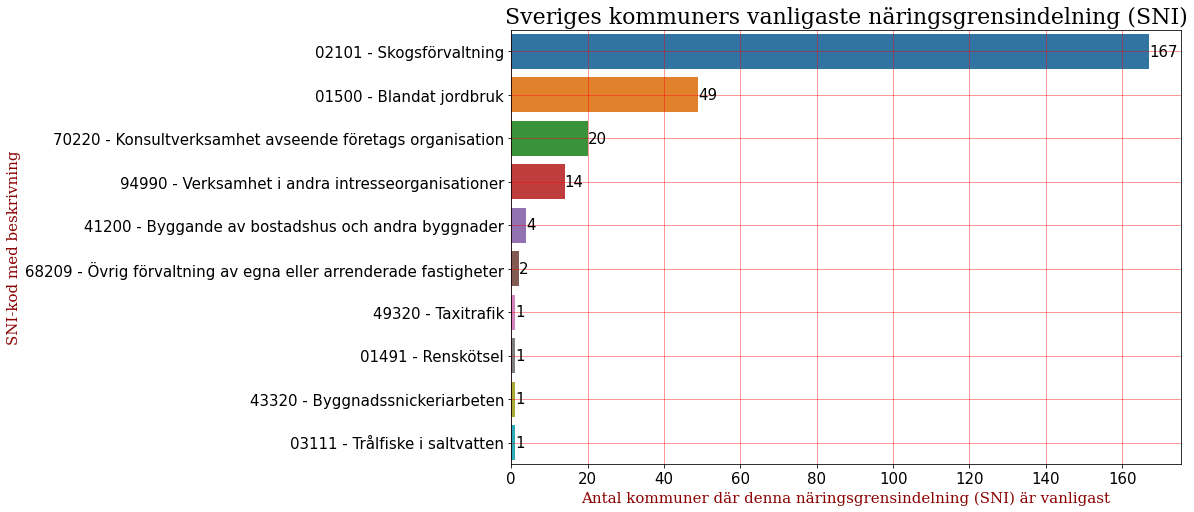

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Ex

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Ex

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Ex

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Ex

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Ex

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "I:\Python\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "I:\Python\Anaconda\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] En befintlig anslutning tvingades att stänga av fjärrvärddatorn
Ex

In [121]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = vanligaste_sni_per_kommun,y = 0,
                  order=vanligaste_sni_per_kommun[0].value_counts().index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("SNI-kod med beskrivning", fontdict=font2)
plt.xlabel("Antal kommuner där denna näringsgrensindelning (SNI) är vanligast", fontdict=font2)
plt.title("Sveriges kommuners vanligaste näringsgrensindelning (SNI)",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()



plt.show()

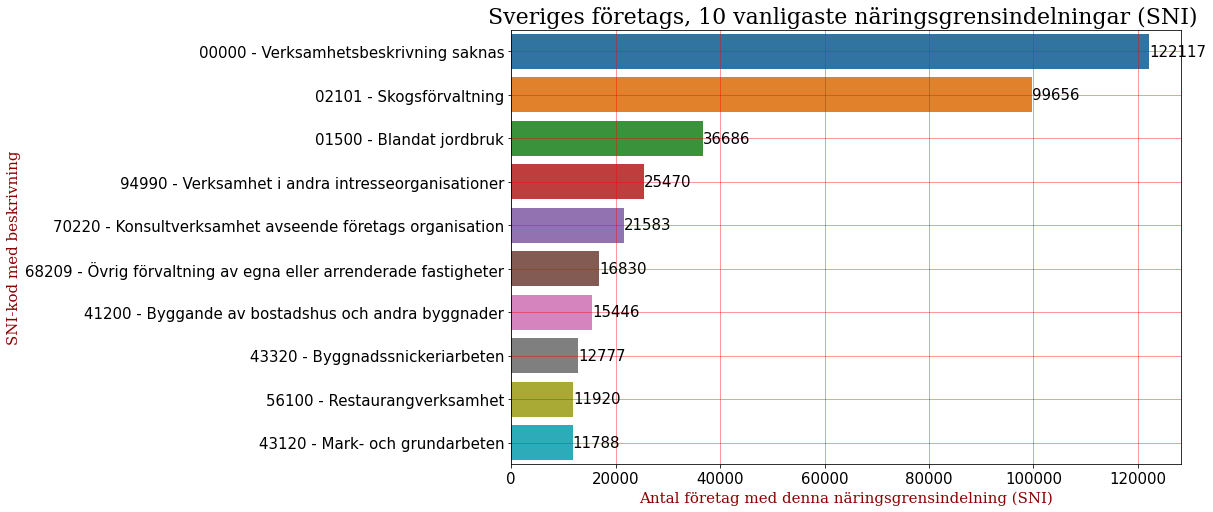

In [98]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = df,y = "sni_beskrivning",
                  order=df["sni_beskrivning"].value_counts().iloc[:10].index, dodge = False)
plt.bar_label(ax.containers[0])
plt.ylabel("SNI-kod med beskrivning", fontdict=font2)
plt.xlabel("Antal företag med denna näringsgrensindelning (SNI)", fontdict=font2)
plt.title("Sveriges företags, 10 vanligaste näringsgrensindelningar (SNI) ",fontdict=font1)
plt.tick_params(labelsize = 15, grid_color='r', grid_alpha=0.5)
plt.grid()

plt.show()